In [1]:
import matplotlib.pyplot as plt
from fundus_image_toolbox.circle_crop import crop

In [2]:
# Get sample images
fundus1, fundus2 = "./imgs/fundus1.jpg", "./imgs/fundus2.jpg"

Cropped Image 1 Shape: (512, 512, 3)


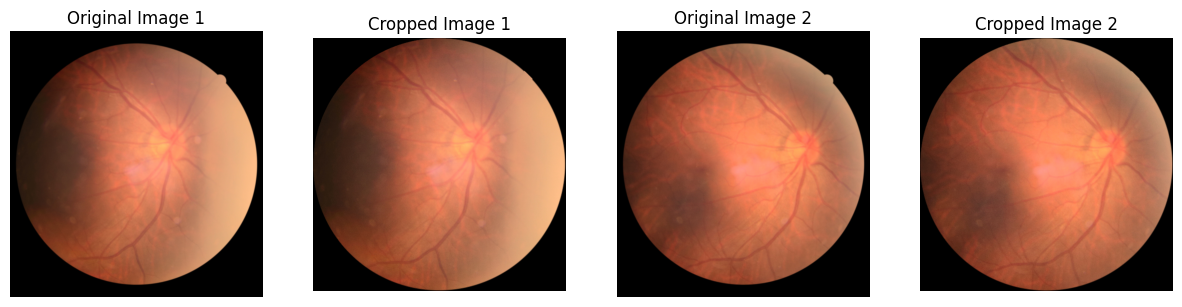

In [3]:
# Crop the images. The input can be path(s) to files or one or many images (numpy array, PIL Image, torch tensor)
inputs = [plt.imread(fundus1), plt.imread(fundus2)]
outputs = crop(inputs, size=(512,512), to_numpy=True)

print(f"Cropped Image 1 Shape: {outputs[0].shape}")

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i in range(len(axs)):
    if i % 2 == 0: 
        axs[i].imshow(inputs[i//2])
        axs[i].set_title(f"Original Image {1+i//2}")
    else:
        axs[i].imshow(outputs[i//2])
        axs[i].set_title(f"Cropped Image {1+i//2}")
    axs[i].axis("off")


Show center and circle

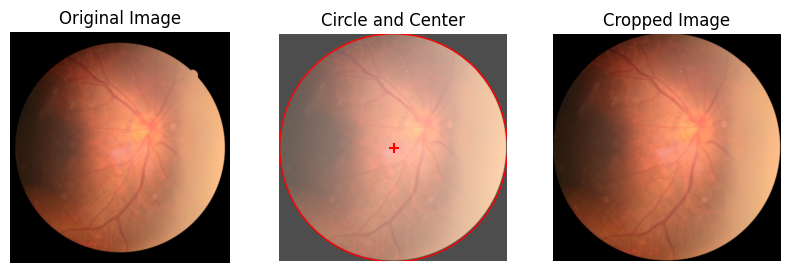

In [4]:
import matplotlib.pyplot as plt
from fundus_image_toolbox.circle_crop import crop

img_aligned, mask, center, radius = crop(fundus1, size=(512,512), return_all=True, to_numpy=True)
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

axs[0].imshow(plt.imread(fundus1))
axs[0].set_title("Original Image")

axs[1].imshow(img_aligned, alpha=.7)
axs[1].scatter(center[1], center[0], c='r', s=50, marker='+')
circle = plt.Circle((center[1], center[0]), radius, color='r', fill=False)
axs[1].add_artist(circle)
axs[1].set_title("Circle and Center")

axs[2].imshow(img_aligned)
axs[2].set_title("Cropped Image")

for ax in axs:
    ax.axis('off')

plt.show()